# <center>Laboratorium 4<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

In [2]:
not_diff = lambda x: np.sign(x) * x + x * x
once_diff = lambda x: np.sign(x) * x * x
thrice_diff = lambda x: abs(np.sin(5 * x)) * abs(np.sin(5 * x)) * abs(np.sin(5 * x))
analytical1 = lambda x: 1 / (1 + x**2)
analytical25 = lambda x: 1 / (1 + 25 * x**2)
analytical100 = lambda x: 1 / (1 + 100 * x**2)

not_cont = lambda x: np.sign(x)

***Zadanie 3.***  
Dla funkcji ciągłej nieróżniczkowalnej z [Zadania 2](#zad2) przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* oraz przy użyciu wzoru barycentrycznego podanego na wykładzie (funkcja barycentric_inte w main.py).  

Wykonać w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000, 100000. Wyliczyć wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000.  

Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  

Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  

Przykład użycia funkcji barycentric_interpolate:

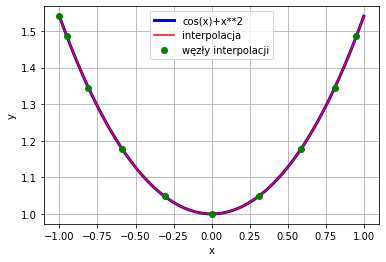

In [3]:
from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa
interpolation_nodes_number = 1e1
xch = np.cos(np.linspace(1,int(interpolation_nodes_number),int(interpolation_nodes_number))*np.pi/interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()

zad 3



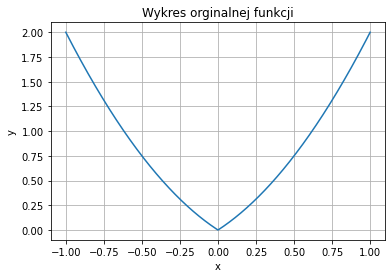

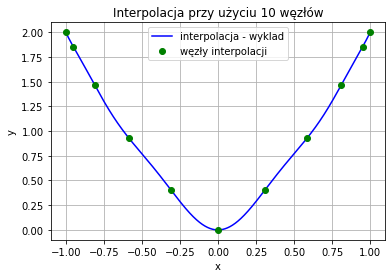

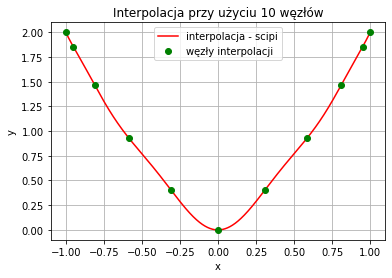

Jakość interpolacji: 0.05921962436810316



In [4]:
from main import barycentric_inte, chebyshev_nodes, bar_czeb_weights, L_inf
print("zad 3\n")


x = np.linspace(-1,1,1000)
y = not_diff(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Wykres orginalnej funkcji")
plt.grid()
plt.show()

#Tworzenie węzłów
cz_nodes = np.array(chebyshev_nodes(10))
cz_nodes_weights = np.array(bar_czeb_weights(10))
y_nodes = np.array(not_diff(cz_nodes))


# Interpolacja 10
yinp = barycentric_inte(cz_nodes, y_nodes, cz_nodes_weights, x)


yinp_sci = barycentric_interpolate(cz_nodes, y_nodes, x)
plt.plot(x, yinp,'b',label = 'interpolacja - wyklad')
plt.plot(cz_nodes, y_nodes,'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolacja przy użyciu 10 węzłów")
plt.grid()
plt.legend(loc = 0)
plt.show()

plt.plot(x, yinp_sci,'r',label = 'interpolacja - scipi')
plt.plot(cz_nodes, y_nodes,'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolacja przy użyciu 10 węzłów")
plt.grid()
plt.legend(loc = 0)
plt.show()

print("Jakość interpolacji: {}\n".format(L_inf(y, yinp)))


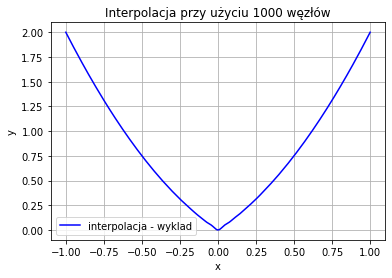

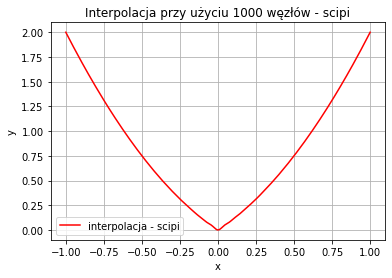

Jakość interpolacji: 0.00596541892441703



In [5]:

#Tworzenie węzłów
cz_nodes = np.array(chebyshev_nodes(100))
cz_nodes_weights = np.array(bar_czeb_weights(100))
y_nodes = np.array(not_diff(cz_nodes))


# Interpolacja 100
yinp = barycentric_inte(cz_nodes, y_nodes, cz_nodes_weights, x)
yinp_sci = barycentric_interpolate(cz_nodes, y_nodes, x)

plt.plot(x, yinp,'b',label = 'interpolacja - wyklad')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolacja przy użyciu 1000 węzłów")
plt.grid()
plt.legend(loc = 0)
plt.show()

plt.plot(x, yinp_sci,'r',label = 'interpolacja - scipi')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolacja przy użyciu 1000 węzłów - scipi")
plt.grid()
plt.legend(loc = 0)
plt.show()

print("Jakość interpolacji: {}\n".format(L_inf(y, yinp)))



c:\users\agata\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:547: RuntimeWarning: divide by zero encountered in reciprocal
  self.wi **= -1
c:\users\agata\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:547: RuntimeWarning: overflow encountered in reciprocal
  self.wi **= -1
c:\users\agata\appdata\local\programs\python\python38\lib\site-packages\scipy\interpolate\polyint.py:642: RuntimeWarning: overflow encountered in true_divide
  c = self.wi/c
c:\users\agata\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


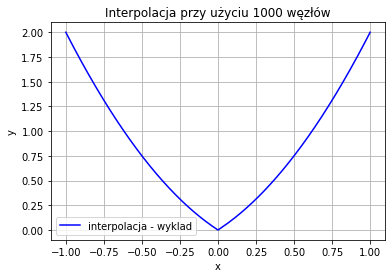

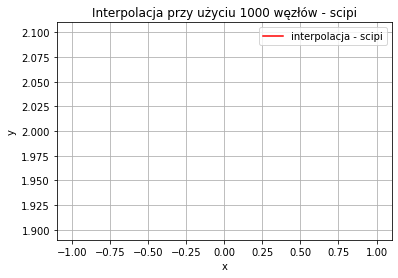

Jakość interpolacji: 0.0005739642836657185

Jak widać, dla wyższych liczb węzłów interpolacja z modułu scipy przestaje działać


In [6]:
#Tworzenie węzłów
cz_nodes = np.array(chebyshev_nodes(1000))
cz_nodes_weights = np.array(bar_czeb_weights(1000))
y_nodes = np.array(not_diff(cz_nodes))


# Interpolacja 1000
yinp = barycentric_inte(cz_nodes, y_nodes, cz_nodes_weights, x)

yinp_sci = barycentric_interpolate(cz_nodes, y_nodes, x)
plt.plot(x, yinp,'b',label = 'interpolacja - wyklad')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolacja przy użyciu 1000 węzłów")
plt.grid()
plt.legend(loc = 0)
plt.show()

plt.plot(x, yinp_sci,'r',label = 'interpolacja - scipi')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolacja przy użyciu 1000 węzłów - scipi")
plt.grid()
plt.legend(loc = 0)
plt.show()

print("Jakość interpolacji: {}\n".format(L_inf(y, yinp)))

print("Jak widać, dla wyższych liczb węzłów interpolacja z modułu scipy przestaje działać")

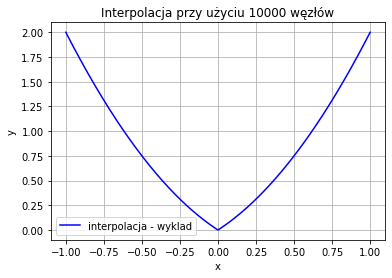

Jakość interpolacji: 8.303505128190447e-06



In [7]:
#Tworzenie węzłów
cz_nodes = np.array(chebyshev_nodes(10000))
cz_nodes_weights = np.array(bar_czeb_weights(10000))
y_nodes = np.array(not_diff(cz_nodes))


# Interpolacja 10000
yinp = barycentric_inte(cz_nodes, y_nodes, cz_nodes_weights, x)

plt.plot(x, yinp,'b',label = 'interpolacja - wyklad')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolacja przy użyciu 10000 węzłów")
plt.grid()
plt.legend(loc = 0)
plt.show()


print("Jakość interpolacji: {}\n".format(L_inf(y, yinp)))

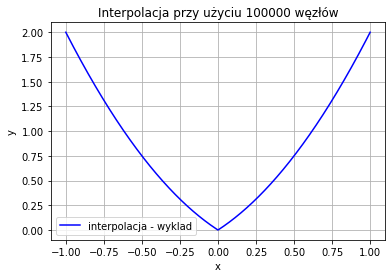

Jakość interpolacji: 6.550513118432424e-08



In [8]:
#Tworzenie węzłów
cz_nodes = np.array(chebyshev_nodes(100000))
cz_nodes_weights = np.array(bar_czeb_weights(100000))
y_nodes = np.array(not_diff(cz_nodes))


# Interpolacja 100000
yinp = barycentric_inte(cz_nodes, y_nodes, cz_nodes_weights, x)
plt.plot(x, yinp,'b',label = 'interpolacja - wyklad')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolacja przy użyciu 100000 węzłów")
plt.grid()
plt.legend(loc = 0)
plt.show()


print("Jakość interpolacji: {}\n".format(L_inf(y, yinp)))


In [9]:
print("Analiza czasowa:\n")

for number_of_nodes in [10, 100, 1000, 10000]:
    print('SIZE: ', number_of_nodes)
    print('Timing: ')

    cz_nodes = np.array(chebyshev_nodes(number_of_nodes))
    cz_nodes_weights = np.array(bar_czeb_weights(number_of_nodes))
    y_nodes = np.array(not_diff(cz_nodes))

    saved_timing = %timeit -r 5 -n 10 -o barycentric_inte(cz_nodes, y_nodes, cz_nodes_weights, x)
    saved_timing.average
    saved_timing.stdev
    print('Memory usage: ')
    %memit barycentric_inte(cz_nodes, y_nodes, cz_nodes_weights, x)
    print('\n')
print("Dla 10000 wykoanie analizy o takiej liczbie powtórzeń oraz cykli zajmowało\n stanowczo zbyt"
      " wiele czasu, dlatego zostało pominięte")

Analiza czasowa:

SIZE:  10
Timing: 
7.64 ms ± 109 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 110.68 MiB, increment: 0.10 MiB


SIZE:  100
Timing: 
15.3 ms ± 166 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 110.69 MiB, increment: 0.00 MiB


SIZE:  1000
Timing: 
89.3 ms ± 900 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 109.86 MiB, increment: 0.01 MiB


SIZE:  10000
Timing: 
1.02 s ± 25.9 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 110.63 MiB, increment: 0.00 MiB


Dla 10000 wykoanie analizy o takiej liczbie powtórzeń oraz cykli zajmowało
 stanowczo zbyt wiele czasu, dlatego zostało pominięte



***Zadanie 4.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.


***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania 2](#zad2). Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 
W tym celu należy wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów i wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
Dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

ze względu na szybkość obliczeń uznaję, że zero maszynowe znajduje się na ok 10^-13
[0.007616055567867567, 7.531864985178382e-05, 7.480901684445674e-07, 3.6516694889891316e-10, 3.441691376337985e-14]


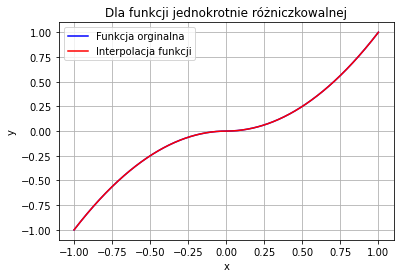

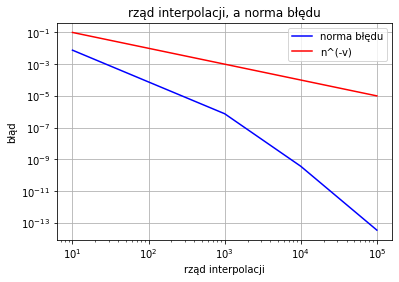

In [10]:
print("ze względu na szybkość obliczeń uznaję, że zero maszynowe znajduje się na ok 10^-13")
#dla jednokrotnie różniczkowalnej:

x = np.linspace(-1, 1, 1000)
interpolation_number = []
for i in range(1,6):
    interpolation_number.append(10**i)

y = once_diff(x)
additional = 1 / np.array(interpolation_number) #jako że wszystko jest przedstawiane na wykresach o osiach logarytmicznych
                                    #nie widać zbytnio różnic typu 1/2 a 1/3 (1/4 itd), więc zamiast rzędu użyłam
                                    #całą liczbę (zapiast 3 dla 1000, sam 1000) - funkcja jest jednokrotnie
                                    #różniczkowalna, więc najwyższa pochodna to 1

norm = []
for n in interpolation_number:
    cz_nodes = np.array(chebyshev_nodes(n))
    cz_nodes_weights = np.array(bar_czeb_weights(n))
    y_nodes = np.array(once_diff(cz_nodes))

    yinp = barycentric_inte(cz_nodes, y_nodes, cz_nodes_weights, x)
    norm.append(L_inf(y, yinp))

print(norm)

plt.plot(x, y, "b", label = "Funkcja orginalna")
plt.plot(x, yinp, "r", label = "Interpolacja funkcji")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dla funkcji jednokrotnie różniczkowalnej")
plt.legend()
plt.grid()
plt.show()


plt.plot(interpolation_number, norm, 'b', label = "norma błędu")
plt.plot(interpolation_number, additional, "r", label = "n^(-v)")
plt.title("rząd interpolacji, a norma błędu")
plt.xlabel("rząd interpolacji")
plt.ylabel("błąd")
plt.legend()
plt.xscale("log")
plt.yscale("log")

plt.grid()
plt.show()


[0.2771035330892448, 0.00014259237109697003, 1.1873491706083618e-07, 4.569169949917378e-11, 3.4861002973229915e-14]


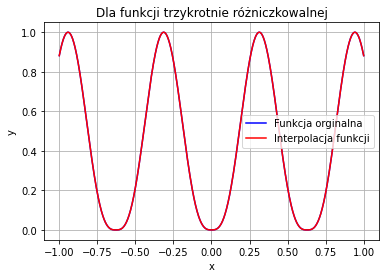

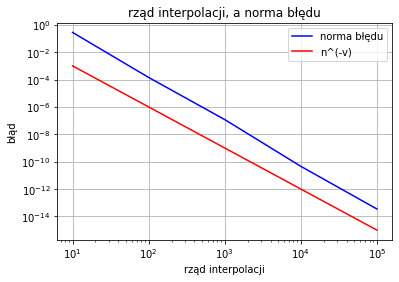

In [11]:
#dla trzykrotnie różniczkowalnej:

x = np.linspace(-1, 1, 1000)
interpolation_number = []
for i in range(1,6):
    interpolation_number.append(10**i)

y = thrice_diff(x)
additional = 1 / np.array(interpolation_number) / np.array(interpolation_number) / np.array(interpolation_number)
norm = []

for n in interpolation_number:
    cz_nodes = np.array(chebyshev_nodes(n))
    cz_nodes_weights = np.array(bar_czeb_weights(n))
    y_nodes = np.array(thrice_diff(cz_nodes))

    yinp = barycentric_inte(cz_nodes, y_nodes, cz_nodes_weights, x)
    norm.append(L_inf(y, yinp))

print(norm)

plt.plot(x, y, color="b", label = "Funkcja orginalna")
plt.plot(x, yinp, "r", label = "Interpolacja funkcji")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dla funkcji trzykrotnie różniczkowalnej")
plt.legend()
plt.grid()
plt.show()


plt.plot(interpolation_number, norm, "b", label = "norma błędu")
plt.plot(interpolation_number, additional, "r", label = "n^(-v)")
plt.title("rząd interpolacji, a norma błędu")
plt.xlabel("rząd interpolacji")
plt.ylabel("błąd")
plt.legend()
plt.xscale("log")
plt.yscale("log")

plt.grid()
plt.show()



***Zadanie 6.***  
Przeprowadzić analogiczną analizę dla funkcji analitycznych z [Zadania 2](#zad2). Wykres sporządzić w skali pół logarytmicznej (tylko oś y). 
Dla porównania umieścić na wykresie dodatkowo wykres oszacowania dla interpolacji funkcji analitycznych (zobacz wykład). W tym celu należy wyliczyć maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

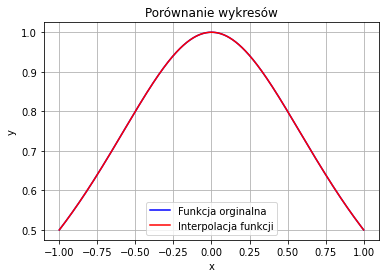

[0.20846874706755747, 2.6440160026702222e-28, 2.847707051292356e-297]


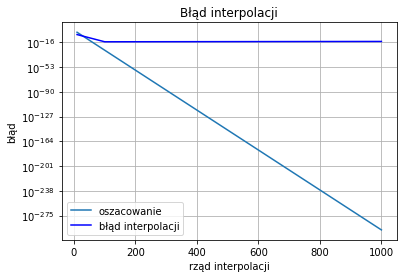

c:\users\agata\appdata\local\programs\python\python38\lib\site-packages\numpy\ma\core.py:2829: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


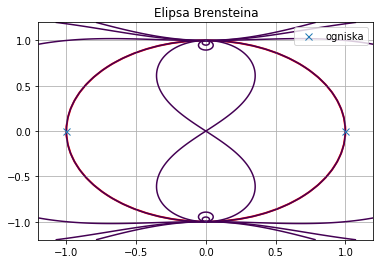

In [12]:
from matplotlib.patches import Ellipse

#  a = 1
x = np.linspace(-1, 1, 1000)
y = analytical1(x)
norm = []
interpolation_number = []

for i in range(1,4):
    interpolation_number.append(10**i)

for n in interpolation_number:
    cz_nodes = chebyshev_nodes(n)
    cz_nodes_weights = bar_czeb_weights(n)
    y_nodes = analytical1(cz_nodes)
    yinp = barycentric_inte(cz_nodes, y_nodes, cz_nodes_weights, x)
    norm.append(L_inf(y, yinp))

plt.plot(x, y, color="b", label = "Funkcja orginalna")
plt.plot(x, yinp, "r", label = "Interpolacja funkcji")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Porównanie wykresów")
plt.legend()
plt.grid()
plt.show()

b=0.99
a=1

rho=a+b
M=analytical1(1j*b)
oszacowanie = []

for i in range(len(interpolation_number)):
    oszacowanie.append(4* np.real(M) * rho ** (-interpolation_number[i])/(rho-1))

print(oszacowanie)

plt.plot(interpolation_number,oszacowanie,label='oszacowanie')
plt.plot(interpolation_number, norm, 'b', label = "błąd interpolacji")
plt.legend()
plt.yscale("log")
plt.title("Błąd interpolacji")
plt.xlabel("rząd interpolacji")
plt.ylabel("błąd")
plt.grid()

plt.show()

# z wykładu
x = np.linspace(-1.2, 1.2, 1000)
y = np.linspace(-1.2, 1.2, 1000)
X, Y = np.meshgrid(x, y)
Z = analytical1(X + 1j * Y)
elipse = plt.figure()
ax = plt.gca()
ax.contour(X, Y, Z, [0.05, 0.1, 0.2, 0.5, 1, 5, 10, 100 ,1000])

b=1
a=1

ax=plt.gca()
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b,
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x',label='ogniska',markersize=7)
ax.legend()
plt.title("Elipsa Brensteina")
plt.grid()
plt.show()


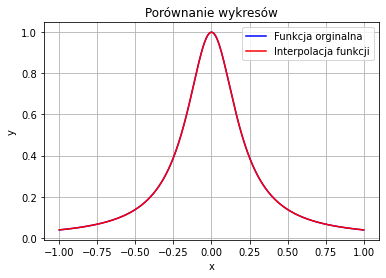

[70.37126758602064, 2.062504178533355, 9.646937573918283e-16, 4.8343242824002514e-169]


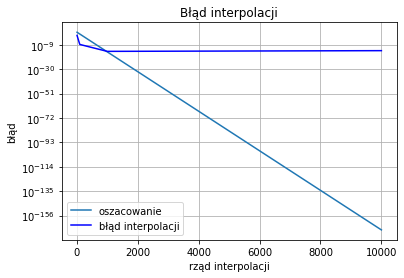

c:\users\agata\appdata\local\programs\python\python38\lib\site-packages\numpy\ma\core.py:2829: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


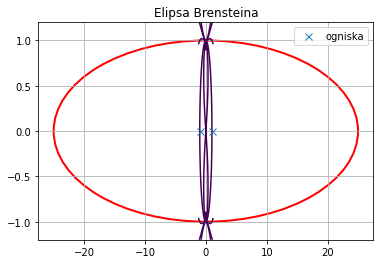

In [13]:
# a = 25
x = np.linspace(-1, 1, 1000)
y = analytical25(x)
norm = []
interpolation_number = []

for i in range(1,5):
    interpolation_number.append(10**i)

for n in interpolation_number:
    cz_nodes = chebyshev_nodes(n)
    cz_nodes_weights = bar_czeb_weights(n)
    y_nodes = analytical25(cz_nodes)
    yinp = barycentric_inte(cz_nodes, y_nodes, cz_nodes_weights, x)
    norm.append(L_inf(y, yinp))

plt.plot(x, y, color="b", label = "Funkcja orginalna")
plt.plot(x, yinp, "r", label = "Interpolacja funkcji")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Porównanie wykresów")
plt.legend()
plt.grid()
plt.show()
b=0.04
a=1

rho=a+b
M=analytical25(1j*b)
oszacowanie = []

for i in range(len(interpolation_number)):
    oszacowanie.append(4* np.real(M) * rho ** (-interpolation_number[i])/(rho-1))

print(oszacowanie)

plt.plot(interpolation_number,oszacowanie,label='oszacowanie')
plt.plot(interpolation_number, norm, 'b', label = "błąd interpolacji")
plt.legend()
plt.yscale("log")
plt.title("Błąd interpolacji")
plt.xlabel("rząd interpolacji")
plt.ylabel("błąd")
plt.grid()

plt.show()

# z wykładu
x = np.linspace(-1.2, 1.2, 1000)
y = np.linspace(-1.2, 1.2, 1000)
X, Y = np.meshgrid(x, y)
Z = analytical1(X + 1j * Y)
elipse = plt.figure()
ax = plt.gca()
ax.contour(X, Y, Z, [0.05, 0.1, 0.2, 0.5, 1, 5, 10, 100 ,1000])

b=1
a=25
ax=plt.gca()
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b,
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x',label='ogniska',markersize=7)
ax.legend()
plt.title("Elipsa Brensteina")
plt.grid()
plt.show()

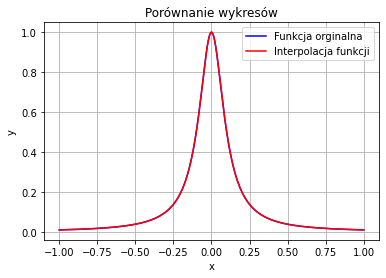

[365.7725069466596, 149.37826760772467, 0.019277513418119136, 2.469943223742036e-41]


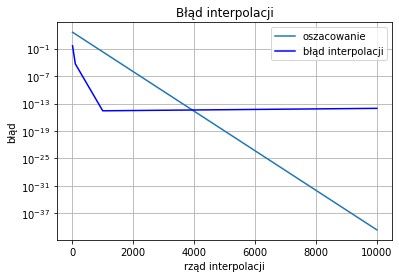

c:\users\agata\appdata\local\programs\python\python38\lib\site-packages\numpy\ma\core.py:2829: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


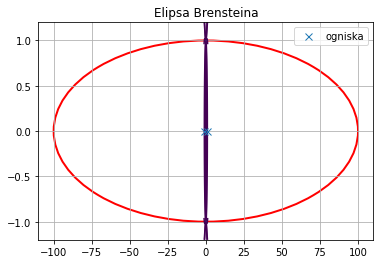

we wszystkich przypadkach jakość interpolacji zmiejsza się wraz ze zwiększeniem ilości węzłów
(po przekroczeniu pewnej wartości n ilości węzłów)


In [14]:
# a = 100
x = np.linspace(-1, 1, 1000)
y = analytical100(x)
norm = []
interpolation_number = []

for i in range(1,5):
    interpolation_number.append(10**i)

for n in interpolation_number:
    cz_nodes = chebyshev_nodes(n)
    cz_nodes_weights = bar_czeb_weights(n)
    y_nodes = analytical100(cz_nodes)
    yinp = barycentric_inte(cz_nodes, y_nodes, cz_nodes_weights, x)
    norm.append(L_inf(y, yinp))



plt.plot(x, y, color="b", label = "Funkcja orginalna")
plt.plot(x, yinp, "r", label = "Interpolacja funkcji")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Porównanie wykresów")
plt.legend()
plt.grid()
plt.show()

b=0.01
a=1

rho=a+b
M=analytical100(1j*b)
oszacowanie = []

for i in range(len(interpolation_number)):
    oszacowanie.append(4* np.real(M) * rho ** (-interpolation_number[i])/(rho-1))

print(oszacowanie)

plt.plot(interpolation_number,oszacowanie,label='oszacowanie') #nie mam pojęcia dlaczego to nie działa
plt.plot(interpolation_number, norm, 'b', label = "błąd interpolacji")
plt.legend()
plt.yscale("log")
plt.title("Błąd interpolacji")
plt.xlabel("rząd interpolacji")
plt.ylabel("błąd")
plt.grid()

plt.show()



# z wykładu
x = np.linspace(-1.2, 1.2, 1000)
y = np.linspace(-1.2, 1.2, 1000)
X, Y = np.meshgrid(x, y)
Z = analytical1(X + 1j * Y)
elipse = plt.figure()
ax = plt.gca()
ax.contour(X, Y, Z, [0.05, 0.1, 0.2, 0.5, 1, 5, 10, 100 ,1000])

b=1
a=100

ax=plt.gca()
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b,
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x',label='ogniska',markersize=7)
ax.legend()
plt.title("Elipsa Brensteina")
plt.grid()
plt.show()



print("we wszystkich przypadkach jakość interpolacji zmiejsza się wraz ze zwiększeniem ilości węzłów\n"
      "(po przekroczeniu pewnej wartości n ilości węzłów)")

***Zadanie 7.***  
Dla funkcji nieciągłej z [Zadania 2](#zad2) przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

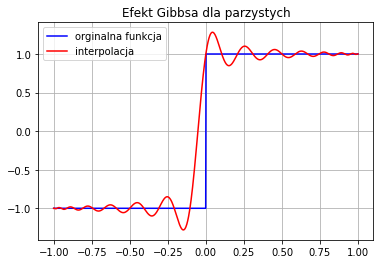

Błąd: 1.9865896710670443


In [15]:
x = np.linspace(-1, 1, 1000)
y = not_cont(x)

cz_nodes_weights = bar_czeb_weights(30)
cz_nodes = chebyshev_nodes(30)
y_nodes = not_cont(cz_nodes)
yinp = barycentric_inte(cz_nodes, y_nodes, cz_nodes_weights, x)

plt.plot(x, y, color="b", label = "orginalna funkcja")
plt.title("Efekt Gibbsa dla parzystych")
plt.plot(x, yinp, "r", label = "interpolacja")
plt.legend()
plt.grid()
plt.show()

print("Błąd: {}".format(L_inf(y, yinp)))

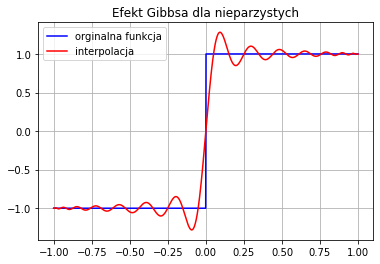

Błąd: 0.9769515230210726


In [16]:
cz_nodes_weights = bar_czeb_weights(31)
cz_nodes = chebyshev_nodes(31)
y_nodes = not_cont(cz_nodes)
yinp = barycentric_inte(cz_nodes, y_nodes, cz_nodes_weights, x)
norm.append(L_inf(y, yinp))

plt.plot(x, y, color="b", label = "orginalna funkcja")
plt.title("Efekt Gibbsa dla nieparzystych")
plt.plot(x, yinp, "r", label = "interpolacja")
plt.legend()
plt.grid()
plt.show()

print("Błąd: {}".format(L_inf(y, yinp)))

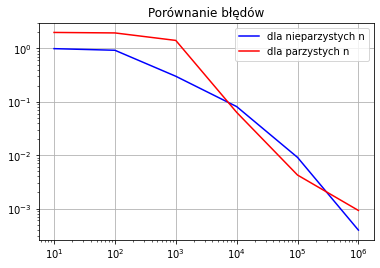

ok min błąd dla n nieparzystych: 0.0003935396270962066

ok min błąd dla n parzystych: 0.0009200536275106863
Błędy różnią się dla parzystych i nieparzystych n, gdyż dla nieparzystych n wielomian aproksymacyjny w pewnym sensie 'ścina' tą nieciągłość. Wielomian parzysty musijeszcze raz zejść pod oś (zmienić znak), nieparzysta w pewnym sensie jest od razu'odpowiednio ustawiona', aby poradzić sobie z tą nieciągłością


In [17]:
x = np.linspace(-1, 1, 1000)
y = not_cont(x)
normnp = []
normp = []
interpolation_number = []

for i in range(1,7):
    interpolation_number.append(10**i + 1)

for n in interpolation_number:
    cz_nodes = chebyshev_nodes(n)
    cz_nodes_weights = bar_czeb_weights(n)
    y_nodes = not_cont(cz_nodes)
    yinp = barycentric_inte(cz_nodes, y_nodes, cz_nodes_weights, x)
    normnp.append(L_inf(y, yinp))

interpolation_number = []

for i in range(1,7):
    interpolation_number.append(10**i)

for n in interpolation_number:
    cz_nodes = chebyshev_nodes(n)
    cz_nodes_weights = bar_czeb_weights(n)
    y_nodes = not_cont(cz_nodes)
    yinp = barycentric_inte(cz_nodes, y_nodes, cz_nodes_weights, x)
    normp.append(L_inf(y, yinp))

plt.plot(interpolation_number, normnp, 'b', label = "dla nieparzystych n")
plt.plot(interpolation_number, normp,'r', label = "dla parzystych n")
plt.legend()
plt.grid()
plt.xscale("log")
plt.yscale("log")

plt.title("Porównanie błędów")
plt.show()

print("ok min błąd dla n nieparzystych: {}\n".format(normnp[-1]))
print("ok min błąd dla n parzystych: {}".format(normp[-1]))

print("Błędy różnią się dla parzystych i nieparzystych n, gdyż dla nieparzystych n "
      "wielomian aproksymacyjny w pewnym sensie 'ścina' tą nieciągłość. Wielomian parzysty musi"
      "jeszcze raz zejść pod oś (zmienić znak), nieparzysta w pewnym sensie jest od razu"
      "'odpowiednio ustawiona', aby poradzić sobie z tą nieciągłością")

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)